In [23]:
import pandas as pd
import numpy as np
import re
import ast
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
df=pd.read_csv("/Users/User/Downloads/emotion_classified_reviews.csv")

In [24]:
df.head()

,Id,categories,published_date,user_id,useful,total_of_person,review_score,review_text,emotions
0,0826414346,['Biography & Autobiography'],2005-01-01,A30TK6U7DNS82R,10,10,5.0,I don't care much for Dr. Seuss but after read...,1
1,0826414346,['Biography & Autobiography'],2005-01-01,A3UH4UZ4RSVO82,10,11,5.0,"If people become the books they read and if ""t...",1
2,0826414346,['Biography & Autobiography'],2005-01-01,A2MVUWT453QH61,7,7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",1
3,0826414346,['Biography & Autobiography'],2005-01-01,A22X4XUPKF66MR,3,3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,1
4,0826414346,['Biography & Autobiography'],2005-01-01,A2F6NONFUDB6UK,2,2,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",1


In [26]:
# Data Preprocessing Functions

# Function to text cleaning
def clean_text(text):

    # Check if the text is a string
     if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and digits
        text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE) # Remove URLs
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = text.lower()  # Convert to lowercase
        return text
     else:
        return ""

# Function to tokenize the words, remove stop words, and treat normalization
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Normalize words by using Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [28]:
# Convert all text reviews to strings
df['review_text'] = df['review_text'].astype(str)

# Apply cleaning to the 'processed_text' column
df['processed_text'] = df['review_text'].apply(clean_text)

# Remove rows where processed_text is empty after cleaning
df = df[df['processed_text'].str.strip().astype(bool)]

## Tokenization

In [29]:
# Tokenize the text into separate words

# Convert all the text reviews to strings
df['processed_text'] = df['processed_text'].astype(str)

# Apply preprocessing to the 'processed_text' column
df["tokens"] = df["processed_text"].apply(preprocess_text)
df.head()

,Id,categories,published_date,user_id,useful,total_of_person,review_score,review_text,emotions,processed_text,tokens
0,0826414346,['Biography & Autobiography'],2005-01-01,A30TK6U7DNS82R,10,10,5.0,I don't care much for Dr. Seuss but after read...,1,i dont care much for dr seuss but after readin...,"[dont, care, much, dr, seuss, reading, philip,..."
1,0826414346,['Biography & Autobiography'],2005-01-01,A3UH4UZ4RSVO82,10,11,5.0,"If people become the books they read and if ""t...",1,if people become the books they read and if th...,"[people, become, book, read, child, father, ma..."
2,0826414346,['Biography & Autobiography'],2005-01-01,A2MVUWT453QH61,7,7,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",1,theodore seuss geisel aka quotdr seussquot wa...,"[theodore, seuss, geisel, aka, quotdr, seussqu..."
3,0826414346,['Biography & Autobiography'],2005-01-01,A22X4XUPKF66MR,3,3,4.0,Philip Nel - Dr. Seuss: American IconThis is b...,1,philip nel dr seuss american iconthis is basi...,"[philip, nel, dr, seuss, american, iconthis, b..."
4,0826414346,['Biography & Autobiography'],2005-01-01,A2F6NONFUDB6UK,2,2,4.0,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",1,dr seuss american icon by philip nel is a thou...,"[dr, seuss, american, icon, philip, nel, thoug..."


In [32]:
df.to_csv('amazon_data.csv',index=True)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# function to transform tweets to vectorized bag of word embedding
def vectorizer(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

# set of all review text
list_corpus = df["processed_text"].tolist()
# set of all review text emotions
list_labels = df["emotions"].tolist()

# convert all text to bag of words vectorized representation
X_counts, count_vectorizer = vectorizer(list_corpus)

# Now X_counts contains the vectorized representation of all your text data
# and list_labels contains the corresponding labels

## Visualizing the Embeddings with LSA

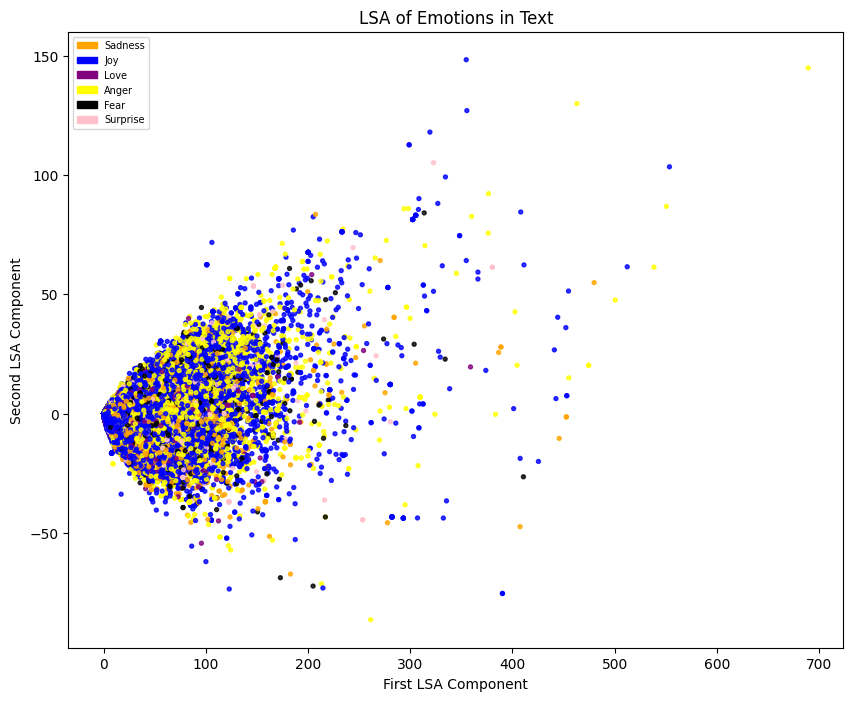

In [37]:
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def plot_LSA(data, labels, savepath="PCA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(data)
    lsa_scores = lsa.transform(data)
    
    colors = ['orange', 'blue', 'purple', 'yellow', 'black', 'pink']
    color_mapper = {label: color for label, color in zip(set(labels), colors)}
    
    if plot:
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=[color_mapper[label] for label in labels])
        
        # Define patches for each emotion             
        red_patch = mpatches.Patch(color='orange', label='Sadness')             
        green_patch = mpatches.Patch(color='blue', label='Joy')             
        purple_patch = mpatches.Patch(color='purple', label='Love')             
        yellow_patch = mpatches.Patch(color='yellow', label='Anger')             
        black_patch = mpatches.Patch(color='black', label='Fear')             
        pink_patch = mpatches.Patch(color='pink', label='Surprise')             
        # Create the legend             
        plt.legend(handles=[red_patch, green_patch, purple_patch, yellow_patch, black_patch, pink_patch], loc='best', prop={'size': 7}) 
        
        plt.title('LSA of Emotions in Text')
        plt.xlabel('First LSA Component')
        plt.ylabel('Second LSA Component')
        
        plt.show()

# Plot LSA
plot_LSA(X_counts, list_labels)

#### Joy and Anger: Points representing Joy (blue) and Anger (yellow) seem to dominate the plot. This suggests that these emotions are more frequently recorded in the dataset.
#### Fear and Surprise: Points representing Fear (black) and Surprise (pink) are less frequent and more scattered, indicating these emotions might be less common in the dataset.

## TF-IDF Bag of Words

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# function to convert text data into TF-IDF embeddings
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    emb = tfidf_vectorizer.fit_transform(data)
    return emb, tfidf_vectorizer
# create TF-IDF vectorized representation of the entire dataset
X_tfidf, tfidf_vectorizer = tfidf(list_corpus)

<Figure size 1000x800 with 0 Axes>

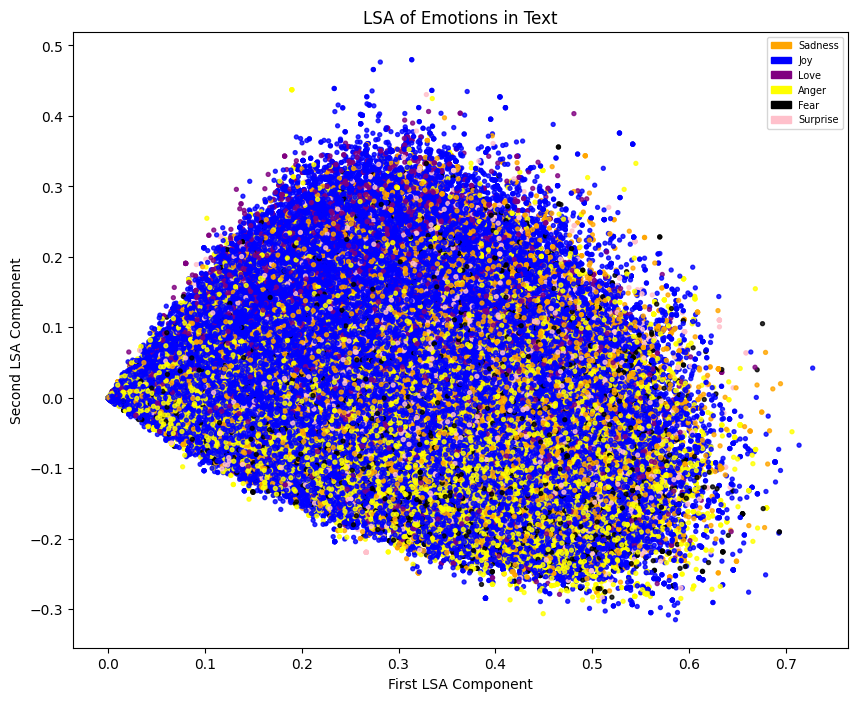

In [39]:
# plot the LSA reduced embeddings in 2 dimensions
fig = plt.figure(figsize=(10, 8))
plot_LSA(X_tfidf, list_labels)
plt.show()

#### The scatter plot shows significant overlap among emotions represented by TF-IDF values, indicating a high degree of similarity in text data across different emotions. Most data points cluster densely in the center, suggesting that TF-IDF vectors for these emotions are not easily separable in this two-dimensional space. The ranges on both axes are relatively small, reflecting normalized TF-IDF values. The visualization implies that distinguishing between emotions using TF-IDF alone is challenging, potentially requiring more sophisticated features or models. 

## Word2Vec

In [40]:
import gensim
# load pre-trained word2vec model from disk
word2vec_path = "/Users/User/Downloads/GoogleNews-vectors-negative300.bin.gz"
# instantiate pre-trained model using gensim
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [41]:
import numpy as np
# function to get average of all word2vec embedded words for each tweets 
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    # tweets with no words have no embedding
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        # generate word2vec embedding from pretrained model
        # if world not in word2vec, generate random 300-dim embedding
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        # generate word2vec embedding from pretrained model
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
        
    # get average word2vec embedding for the tweet
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

# wrapper around the above get_average_word2vec for compatibility with our dataset
def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, generate_missing=generate_missing))
    return list(embeddings)

In [43]:
# get word2vec embeddings as averages of all words in each tweet 
embeddings = get_word2vec_embeddings(word2vec, df)

<Figure size 1600x1600 with 0 Axes>

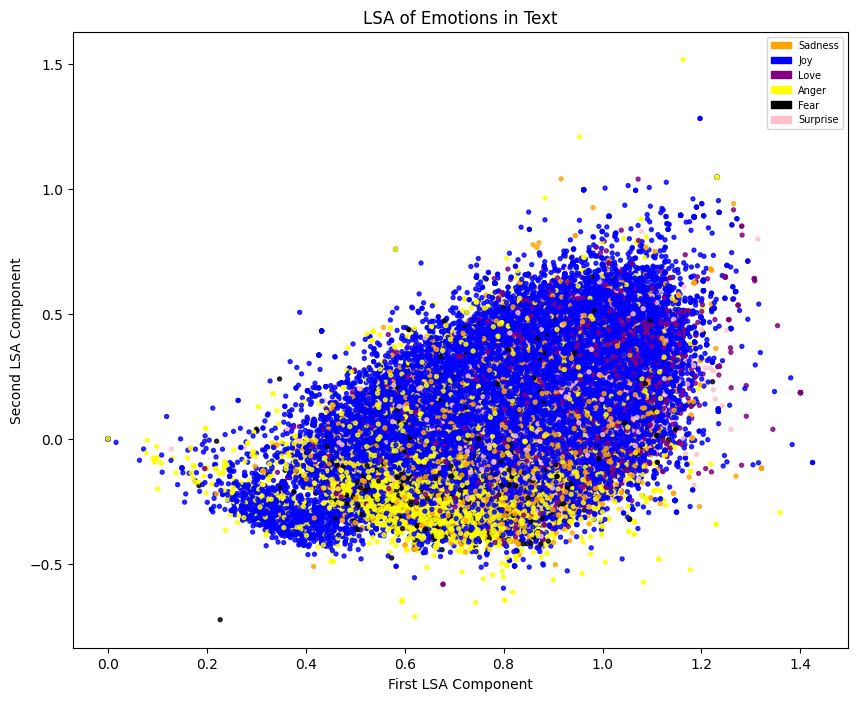

In [44]:
# plot the LSA reduced embeddings in 2 dimensions to see their separation
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

#### There's significant overlap between different emotions, particularly in the dense central area of the plot. This indicates that many texts express emotions in ways that are not easily distinguishable using just these two LSA components. Blue points, representing joy, appear to be the most numerous and widely spread across the plot. This could indicate that joy is either the most common emotion in the dataset.